# BUSINESS PROBLEM UNDERSTANDING

We Need to find if the customer is eligible for loan or not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("LoanData.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
# Drop the unimportant columns 
df.drop(columns='Loan_ID',inplace=True)

In [6]:
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [7]:
df["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [8]:
df["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [9]:
df["Married"].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [10]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [11]:
df["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [12]:
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [13]:
df["Education"].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [14]:
df["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [15]:
df["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [16]:
# Create a new columns as per requirements

In [17]:
df["Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df.drop(columns=["ApplicantIncome","CoapplicantIncome"],inplace=True)

In [18]:
df["Income"].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Income, dtype: float64

In [19]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [20]:
df["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [21]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [22]:
# Replacing Credit_History 0 as "bad" and 1 as "good"

df["Credit_History"] = df["Credit_History"].replace({0:"bad",1:"good"})

In [23]:
df["Credit_History"].unique()

array(['good', 'bad', nan], dtype=object)

In [24]:
df["Credit_History"].value_counts()

Credit_History
good    475
bad      89
Name: count, dtype: int64

In [25]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [26]:
df["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [27]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [28]:
df["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [29]:
continuous = ["Income","LoanAmount"]
discerete_categorical = ["Gender","Married","Education","Self_Employed",
                        "Credit_History","Property_Area","Loan_Status"]
discrete_count = ["Dependents","Loan_Amount_Term"]

In [30]:
df.dtypes

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History       object
Property_Area        object
Loan_Status          object
Income              float64
dtype: object

**Exploratory Data Analysis**

In [31]:
# for continuous variables
df[continuous].describe()

,Income,LoanAmount
count,614.000000,592.000000
mean,7024.705081,146.412162
std,6458.663872,85.587325
min,1442.000000,9.000000
25%,4166.000000,100.000000
50%,5416.500000,128.000000
75%,7521.750000,168.000000
max,81000.000000,700.000000


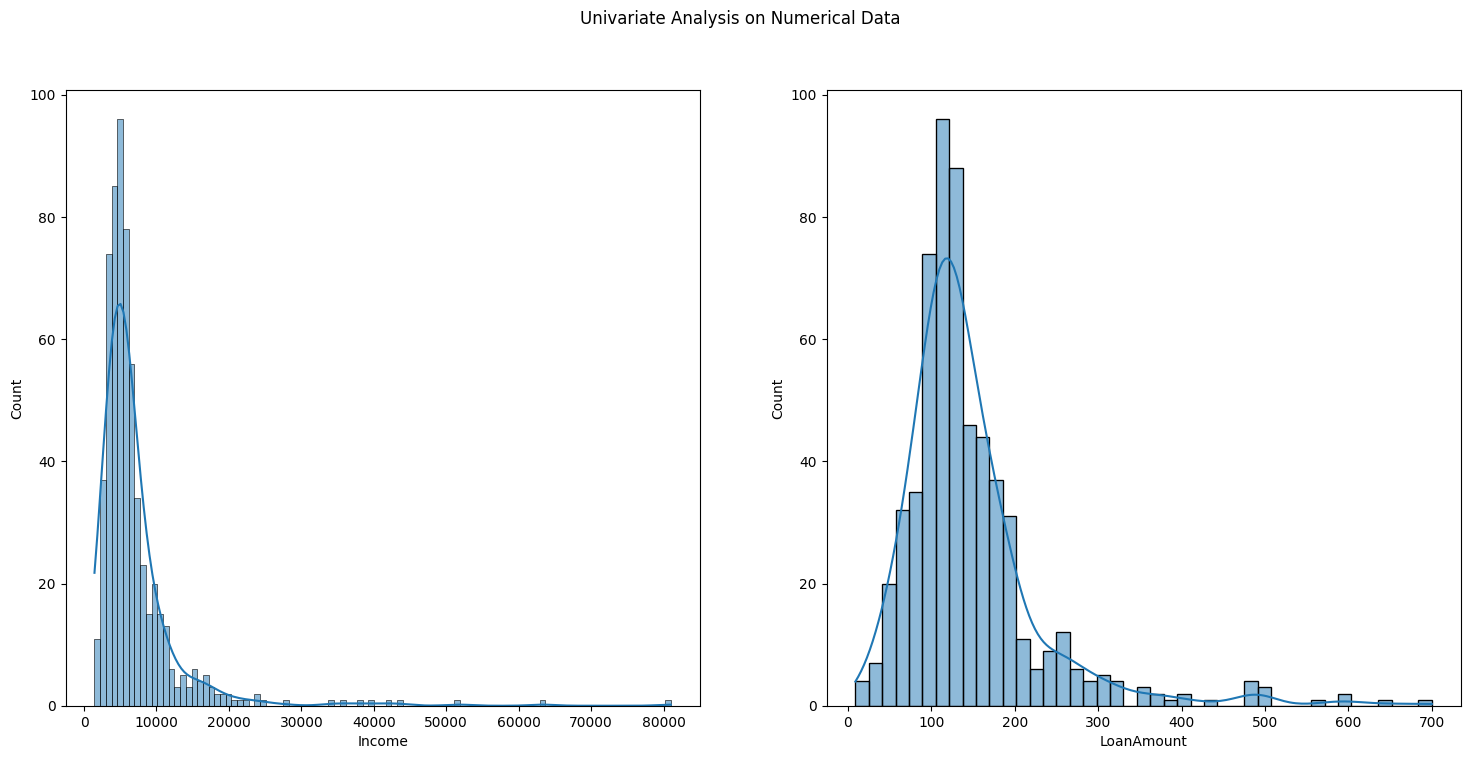

In [32]:
plt.rcParams["figure.figsize"] = [18,8]

plt.subplot(1,2,1)
sns.histplot(df["Income"],kde=True)

plt.subplot(1,2,2)
sns.histplot(df["LoanAmount"],kde=True)

plt.suptitle("Univariate Analysis on Numerical Data")
plt.show()

In [33]:
df[continuous].skew()

Income        5.633449
LoanAmount    2.677552
dtype: float64

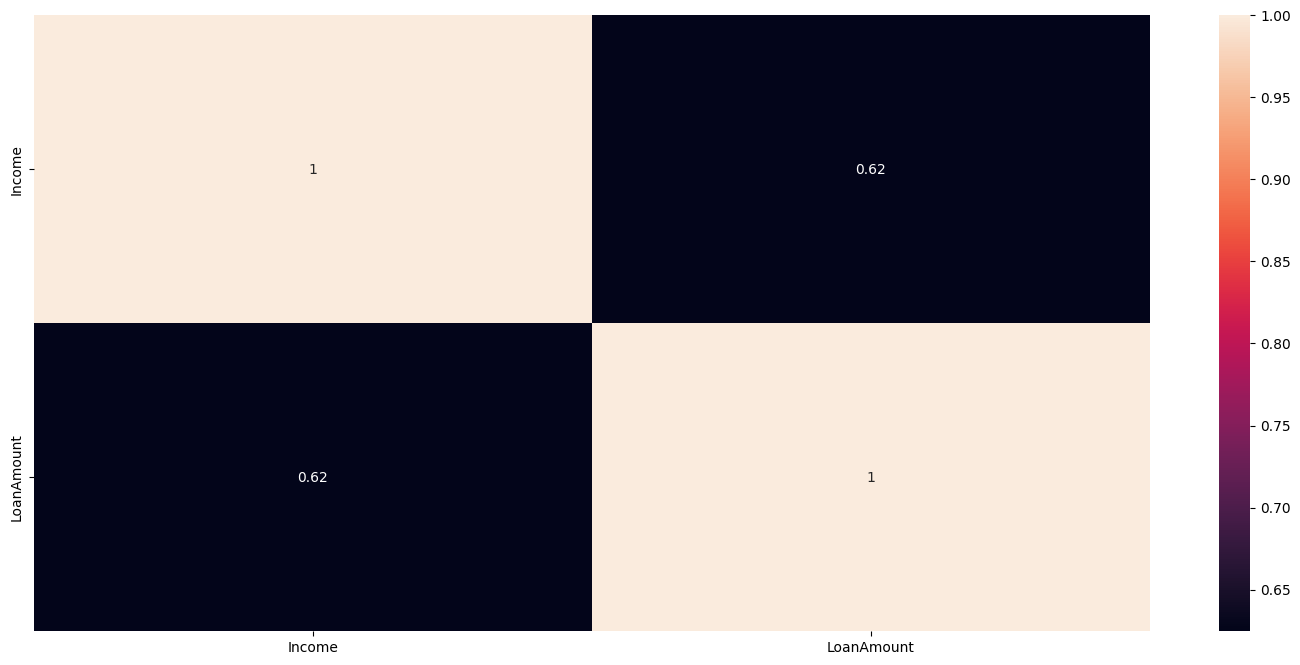

In [34]:
sns.heatmap(df[continuous].corr(),annot=True)
plt.show()

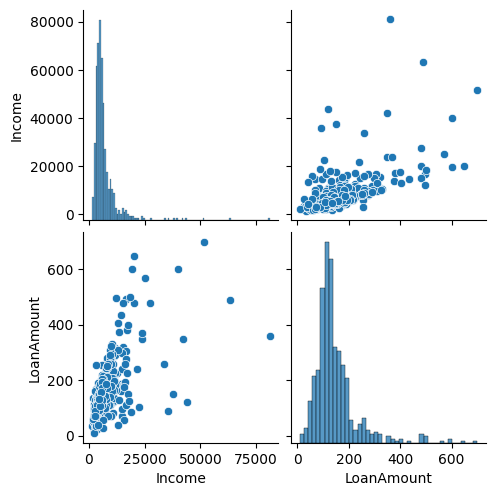

In [35]:
sns.pairplot(df[continuous])
plt.show()

In [36]:
# for discrete variable 
df[discerete_categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


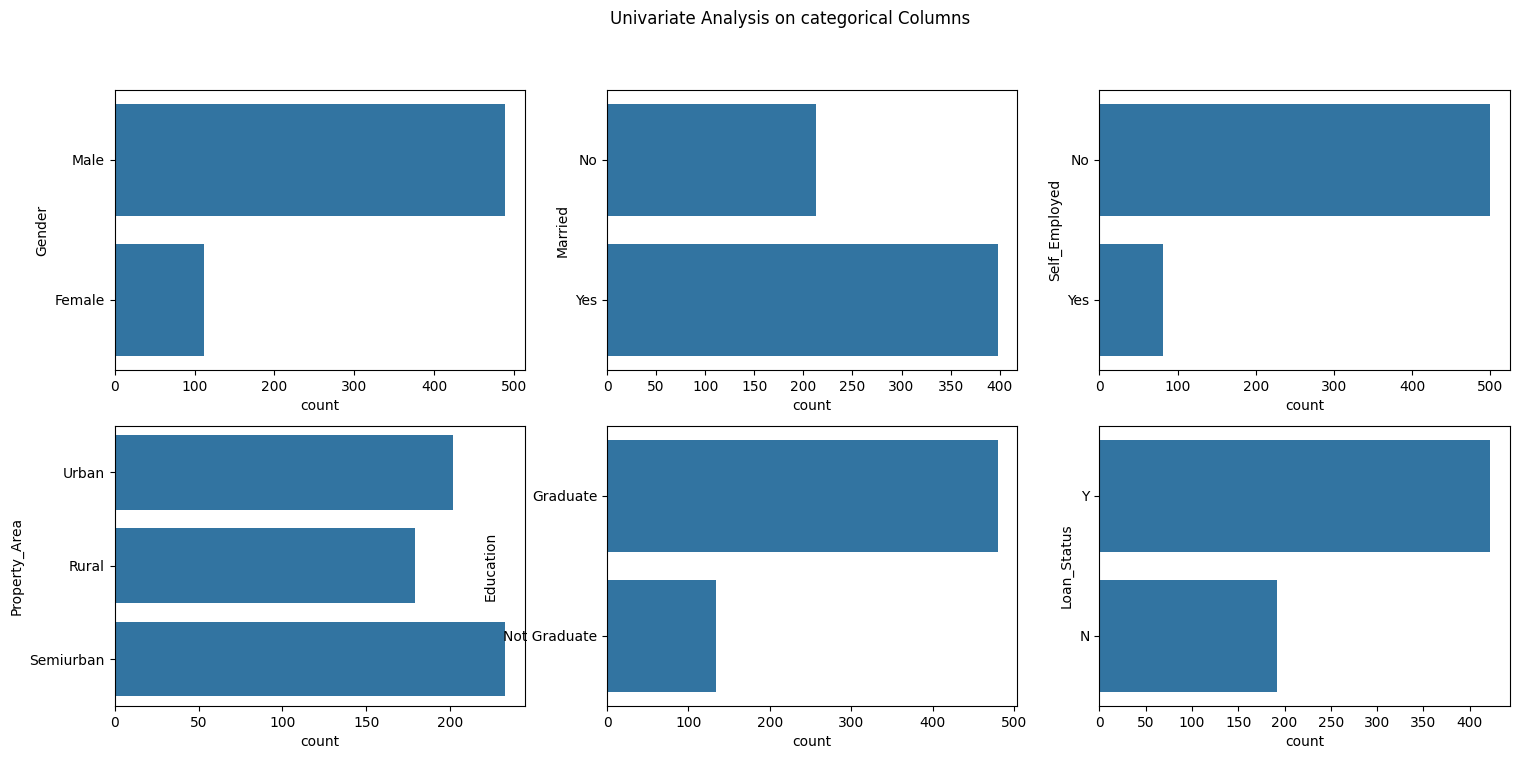

In [37]:
plt.rcParams["figure.figsize"] = (18,8)

plt.subplot(2,3,1)
sns.countplot(df["Gender"])

plt.subplot(2,3,2)
sns.countplot(df["Married"])

plt.subplot(2,3,3)
sns.countplot(df["Self_Employed"])

plt.subplot(2,3,4)
sns.countplot(df["Property_Area"])

plt.subplot(2,3,5)
sns.countplot(df["Education"])

plt.subplot(2,3,6)
sns.countplot(df["Loan_Status"])

plt.suptitle("Univariate Analysis on categorical Columns")
plt.show()

In [38]:
df.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

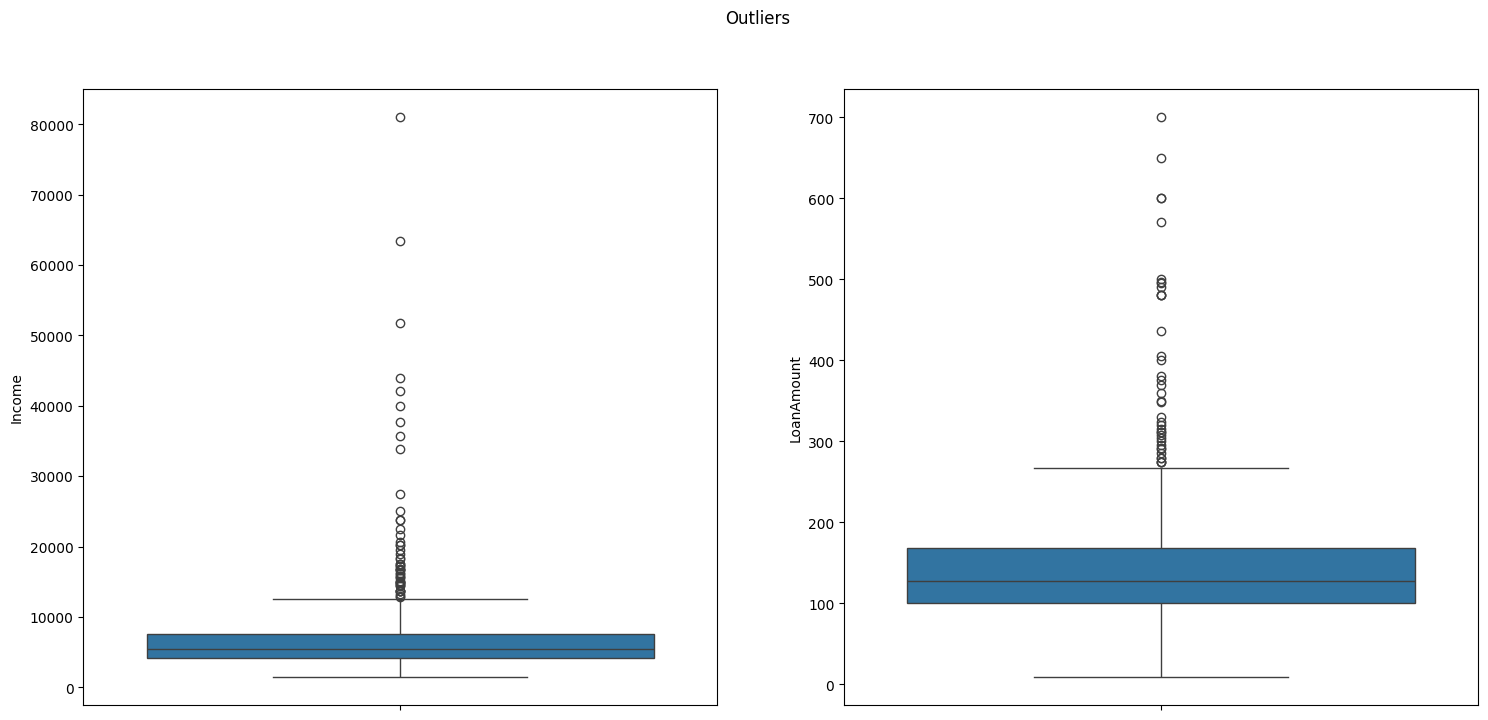

In [39]:
# check outliers

plt.subplot(1,2,1)
sns.boxplot(df["Income"])

plt.subplot(1,2,2)
sns.boxplot(df["LoanAmount"])

plt.suptitle("Outliers")
plt.show()

# Data Preprocessing

In [40]:
# wrong Data 
df["Dependents"] = df["Dependents"].replace({"3+":3})

In [41]:
# Missing Value

df["Dependents"] = df["Dependents"].fillna(0)
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df = df.dropna(subset=["Income","LoanAmount","Loan_Amount_Term","Credit_History"])

In [42]:
# data type conversion

df["Dependents"] = df["Dependents"].astype("int")
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].astype("int") 

In [43]:
# outliers should be keep as it amd shoud be train 

**Encoding**

In [44]:
df["Gender"] = df["Gender"].replace({"Male":1,"Female":0})
df["Married"] = df["Married"].replace({"Yes":1,"No":0})
df["Education"] = df["Education"].replace({"Graduate":1,"Not Graduate":0})
df["Self_Employed"] = df["Self_Employed"].replace({"Yes":1,"No":0})
df["Property_Area"] = df["Property_Area"].replace({"Rural":0,"Semiurban":1,"Urban":2})
df["Credit_History"]  = df["Credit_History"].replace({"good":1,"bad":0})
df['Loan_Status'] = df['Loan_Status'].replace({"Y":1,"N":0})

In [45]:
# Transformations
from scipy.stats import boxcox
df["Income"],a = boxcox(df["Income"])
df["LoanAmount"],c = boxcox(df["LoanAmount"])

In [46]:
df[continuous].skew()

Income       -0.027769
LoanAmount    0.038289
dtype: float64

In [47]:
df.to_excel("clenaed_data.xlsx",index=False)

**x&y**

In [48]:
x = df.drop(columns='Loan_Status',axis=1)
y = df['Loan_Status']

**train_test_split**

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=70)

# Modelling and Evaluation

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Logistic Regression

In [51]:
# Modelling 
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

# Prediction and Evaluation on Train Data
y_pred_train = log_model.predict(x_train)
print("Train_Accuracy",accuracy_score(y_train,y_pred_train))

# cv score
print("cv",cross_val_score(log_model,x_train,y_train,cv=5,scoring="accuracy").mean())

# Predition and Evaluation on Test Data
y_pred_test = log_model.predict(x_test)
print("Test_Accuracy",accuracy_score(y_test,y_pred_test))



Train_Accuracy 0.8226950354609929
cv 0.8227731092436976
Test_Accuracy 0.7830188679245284


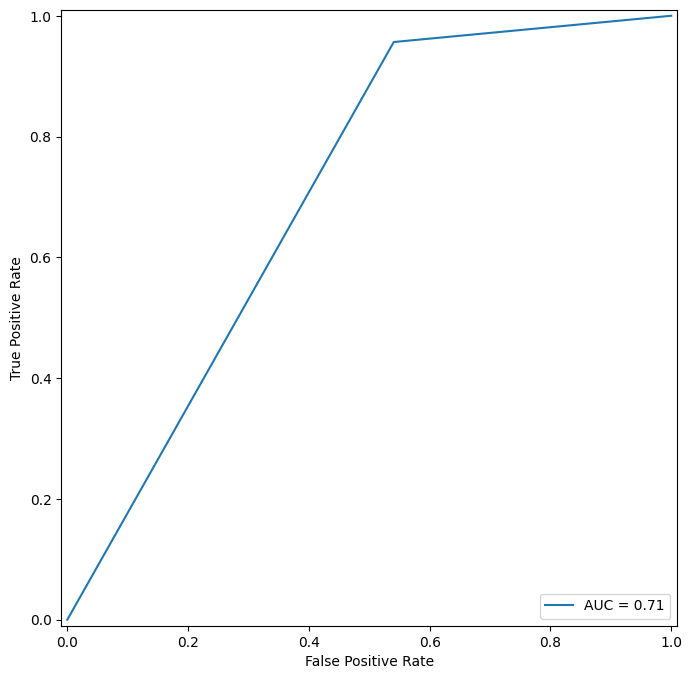

In [52]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr,tpr,thresholds = roc_curve(y_test,y_pred_test)
roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

In [53]:
# auc score
from sklearn.metrics import roc_auc_score
print("Auc_score:",roc_auc_score(y_test,y_pred_test))

Auc_score: 0.7079905992949471


# KNN

In [54]:
# Hyperparameter Tuning

estimator = KNeighborsClassifier()
param_grid = {"n_neighbors":list(range(1,50)),"p":[1,2]}
knn_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
knn_grid.fit(x_train,y_train)

# KNN with best parameter
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=13, p=1)

In [55]:
# Modelling
knn_model = knn_grid.best_estimator_
knn_model.fit(x_train,y_train)


# Prediction and Evaluation on Train Data
y_pred_train = knn_model.predict(x_train)
print("Train_Accuracy",accuracy_score(y_train,y_pred_train))

# cv score
print("cv",cross_val_score(knn_model,x_train,y_train,cv=5,scoring="accuracy").mean())

# Predition and Evaluation on Test Data
y_pred_test = knn_model.predict(x_test)
print("Test_Accuracy",accuracy_score(y_test,y_pred_test))



Train_Accuracy 0.7683215130023641
cv 0.742296918767507
Test_Accuracy 0.6981132075471698


# SVM

In [ ]:
# Hyperparameter Tuning

from sklearn.svm import SVC
estimator = SVC()
param_grid = {"C":[0.1,1],"kernel":["linear","rbf","sigmoid","poly"]}
svm_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
svm_grid.fit(x_train,y_train)

# SVM with best parameter
svm_grid.best_estimator_

In [ ]:

# Modelling
svm_model = svm_grid.best_estimator_
svm_model.fit(x_train,y_train)

# Prediction and Evaluation on Train Data
y_pred_train = svm_model.predict(x_train)
print("Train_Accuracy",accuracy_score(y_train,y_pred_train))

# cv score
print("cv",cross_val_score(svm_model,x_train,y_train,cv=5,scoring="accuracy").mean())

# Predition and Evaluation on Test Data
y_pred_test = svm_model.predict(x_test)
print("Test_Accuracy",accuracy_score(y_test,y_pred_test))


# Decision Tree